In [224]:
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from prophet import Prophet
from sklearn.metrics import mean_absolute_percentage_error, mean_absolute_error, mean_squared_error,r2_score
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

ENCODING TECHNIQUE

In [225]:
data= pd.read_csv('Pizzasales.csv')

In [226]:
data.drop(columns=['Unnamed: 0'], inplace=True)

In [227]:
data['order_date'] = pd.to_datetime(data['order_date'], errors='coerce')

In [228]:
data.head()

,pizza_id,order_id,pizza_name_id,quantity,order_date,order_time,unit_price,total_price,pizza_size,pizza_category,pizza_ingredients,pizza_name,day_of_week,month,year,is_weekend,day_of_year,quarter,is_holiday
0,1,1,hawaiian_m,1,2015-01-01,11:38:36,13.25,13.25,M,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",The Hawaiian Pizza,3,1,2015,0,1,1,0
1,2,2,classic_dlx_m,1,2015-01-01,11:57:40,16.00,16.00,M,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",The Classic Deluxe Pizza,3,1,2015,0,1,1,0
2,3,2,five_cheese_l,1,2015-01-01,11:57:40,18.50,18.50,L,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",The Five Cheese Pizza,3,1,2015,0,1,1,0
3,4,2,ital_supr_l,1,2015-01-01,11:57:40,20.75,20.75,L,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",The Italian Supreme Pizza,3,1,2015,0,1,1,0
4,5,2,mexicana_m,1,2015-01-01,11:57:40,16.00,16.00,M,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",The Mexicana Pizza,3,1,2015,0,1,1,0


In [229]:
columns_to_drop = ['order_id', 'order_time', 'unit_price','quarter']
data = data.drop(columns=columns_to_drop)

In [230]:
label_encoder = LabelEncoder()

columns_to_encode = ['pizza_name_id', 'pizza_name', 'pizza_category', 'pizza_ingredients','pizza_size']

for column in columns_to_encode:
    data[column] = label_encoder.fit_transform(data[column])

In [231]:
data.head()

,pizza_id,pizza_name_id,quantity,order_date,total_price,pizza_size,pizza_category,pizza_ingredients,pizza_name,day_of_week,month,year,is_weekend,day_of_year,is_holiday
0,1,27,1,2015-01-01,13.25,1,1,23,12,3,1,2015,0,1,0
1,2,18,1,2015-01-01,16.00,1,1,20,7,3,1,2015,0,1,0
2,3,20,1,2015-01-01,18.50,0,3,17,8,3,1,2015,0,1,0
3,4,32,1,2015-01-01,20.75,0,2,4,14,3,1,2015,0,1,0
4,5,42,1,2015-01-01,16.00,1,3,31,17,3,1,2015,0,1,0


In [327]:
data.dtypes

pizza_id                      int64
pizza_name_id                 int64
quantity                      int64
order_date           datetime64[ns]
total_price                 float64
pizza_size                    int64
pizza_category                int64
pizza_ingredients             int64
pizza_name                    int64
day_of_week                   int64
month                         int64
year                          int64
is_weekend                    int64
day_of_year                   int64
is_holiday                    int64
dtype: object

In [292]:
data.columns

Index(['pizza_id', 'pizza_name_id', 'quantity', 'order_date', 'total_price',
       'pizza_size', 'pizza_category', 'pizza_ingredients', 'pizza_name',
       'day_of_week', 'month', 'year', 'is_weekend', 'day_of_year',
       'is_holiday'],
      dtype='object')

In [293]:
data.isnull().sum()

pizza_id             0
pizza_name_id        0
quantity             0
order_date           0
total_price          0
pizza_size           0
pizza_category       0
pizza_ingredients    0
pizza_name           0
day_of_week          0
month                0
year                 0
is_weekend           0
day_of_year          0
is_holiday           0
dtype: int64

MODEL TRAINING

ARIMA MODEL

In [186]:
data.set_index('order_date', inplace=True)

In [187]:
train = data['quantity'][:int(0.8 * len(data))]
test = data['quantity'][int(0.8 * len(data)):]

In [188]:
model_arima = ARIMA(train, order=(5, 1, 0))  # (p, d, q) 
model_arima_fit = model_arima.fit()

In [189]:
forecast_arima = model_arima_fit.forecast(steps=len(test) + 7)

In [190]:
forecast_actual = forecast_arima[:len(test)]
forecast_future = forecast_arima[len(test):]

In [191]:
mae_arima = mean_absolute_error(test, forecast_actual)
mse_arima = mean_squared_error(test, forecast_actual)
rmse_arima = np.sqrt(mse_arima)
r2_arima = r2_score(test, forecast_actual)
mape_arima = mean_absolute_percentage_error(test, forecast_actual)

In [192]:
print(f"MAE for ARIMA: {mae_arima:.4f}")
print(f"MSE for ARIMA: {mse_arima:.4f}")
print(f"RMSE for ARIMA: {rmse_arima:.4f}")
print(f"R² for ARIMA: {r2_arima:.4f}")
print(f"MAPE for ARIMA: {mape_arima:.4f}")

MAE for ARIMA: 0.0197
MSE for ARIMA: 0.0208
RMSE for ARIMA: 0.1441
R² for ARIMA: -0.0191
MAPE for ARIMA: 0.0097


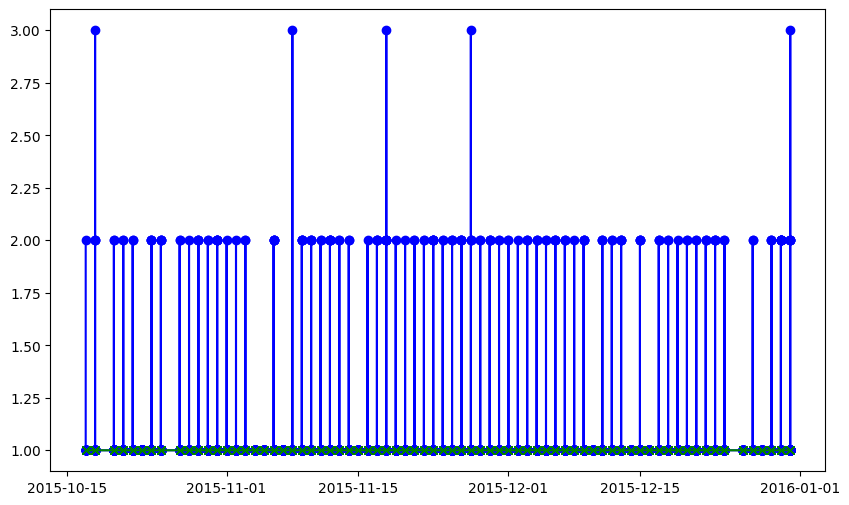

In [193]:
plt.figure(figsize=(10, 6))
plt.plot(test.index, test, label='Actual', color='blue', marker='o')
plt.plot(test.index, forecast_actual, label='Predicted (Test)', color='green', marker='x')

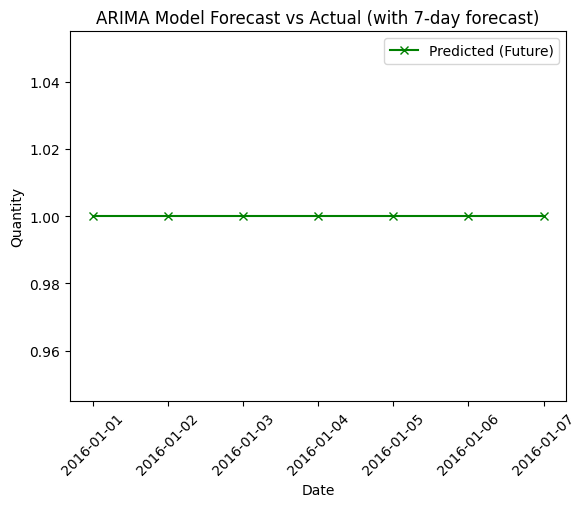

In [194]:
future_dates = pd.date_range(start=test.index[-1] + pd.Timedelta(days=1), periods=7, freq='D')
plt.plot(future_dates, forecast_future, label='Predicted (Future)', color='green', marker='x')

plt.title('ARIMA Model Forecast vs Actual (with 7-day forecast)')
plt.xlabel('Date')
plt.ylabel('Quantity')
plt.xticks(rotation=45)
plt.legend()
plt.show()

In [195]:
comparison_df_arima = pd.DataFrame({
    'Actual': list(test) + [None] * 7,  # Fill future with None for clarity
    'Predicted': list(forecast_actual) + list(forecast_future)
}, index=list(test.index) + list(future_dates))

print(comparison_df_arima.head())

            Actual  Predicted
2015-10-17     2.0        1.0
2015-10-17     1.0        1.0
2015-10-17     1.0        1.0
2015-10-17     1.0        1.0
2015-10-17     1.0        1.0


SARIMA MODEL

In [272]:
data.set_index('order_date', inplace=True)

In [273]:
train = data['quantity'][:int(0.8 * len(data))]
test = data['quantity'][int(0.8 * len(data)):]

In [274]:
model_sarima = SARIMAX(train, order=(5, 1, 0), seasonal_order=(1, 1, 0, 7))
model_sarima_fit = model_sarima.fit()

In [275]:
forecast_sarima = model_sarima_fit.forecast(steps=len(test) + 7)

In [276]:
forecast_actual = forecast_sarima[:len(test)]
forecast_future = forecast_sarima[len(test):]

In [277]:
mae_sarima = mean_absolute_error(test, forecast_actual)
mse_sarima = mean_squared_error(test, forecast_actual)
rmse_sarima = np.sqrt(mse_sarima)
r2_sarima = r2_score(test, forecast_actual)
mape_sarima = mean_absolute_percentage_error(test, forecast_actual)

In [278]:
print(f"MAE for SARIMA: {mae_sarima:.4f}")
print(f"MSE for SARIMA: {mse_sarima:.4f}")
print(f"RMSE for SARIMA: {rmse_sarima:.4f}")
print(f"R² for SARIMA: {r2_sarima:.4f}")
print(f"MAPE for SARIMA: {mape_sarima:.4f}")

MAE for SARIMA: 0.1113
MSE for SARIMA: 0.0805
RMSE for SARIMA: 0.2837
R² for SARIMA: -2.9495
MAPE for SARIMA: 0.1021


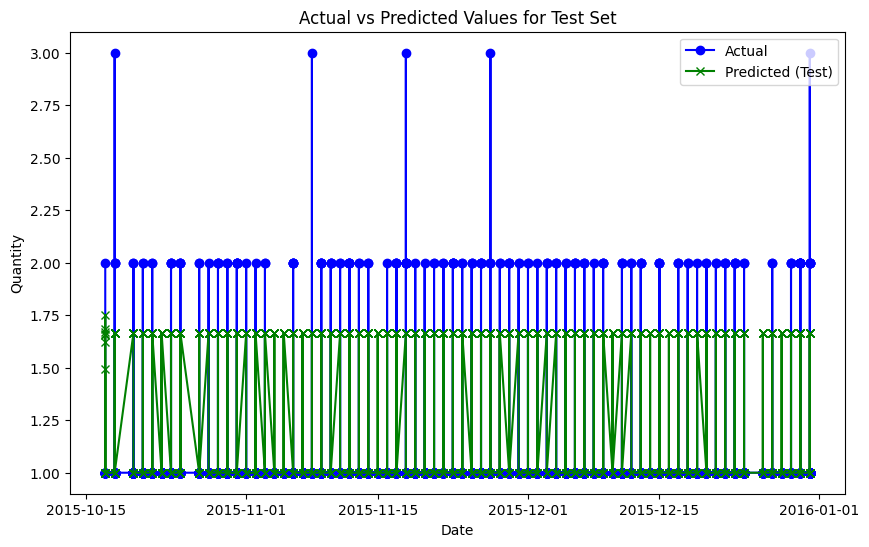

In [318]:
plt.figure(figsize=(10, 6))
plt.plot(test.index, test, label='Actual', color='blue', marker='o')
plt.plot(test.index, forecast_actual, label='Predicted (Test)', color='green', marker='x')
plt.title('Actual vs Predicted Values for Test Set')  
plt.xlabel('Date') 
plt.ylabel('Quantity')
plt.legend()
plt.show()

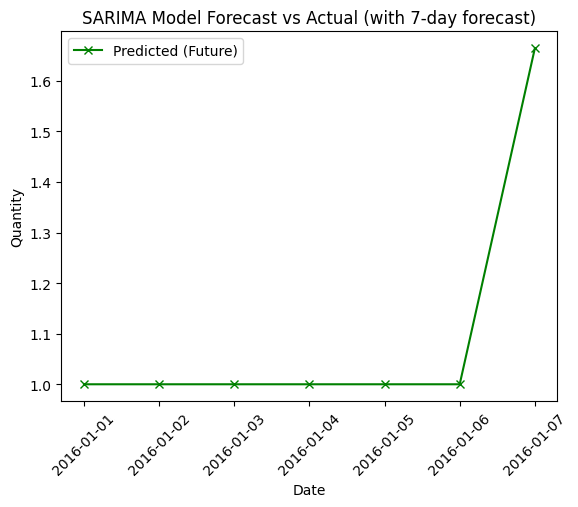

In [315]:
future_dates = pd.date_range(start=test.index[-1] + pd.Timedelta(days=1), periods=7, freq='D')
plt.plot(future_dates, forecast_future, label='Predicted (Future)', color='green', marker='x')

plt.title('SARIMA Model Forecast vs Actual (with 7-day forecast)')
plt.xlabel('Date')
plt.ylabel('Quantity')
plt.xticks(rotation=45)
plt.legend()
plt.show()


In [316]:
comparison_df_sarima = pd.DataFrame({
    'Actual': list(test) + [None] * 7,  
    'Predicted': list(forecast_actual) + list(forecast_future)
}, index=list(test.index) + list(future_dates))

print(comparison_df_sarima.head()) 

            Actual  Predicted
2015-10-17     2.0   1.495181
2015-10-17     1.0   1.000000
2015-10-17     1.0   1.000000
2015-10-17     1.0   1.000000
2015-10-17     1.0   1.000000


PORPHET MODEL

In [170]:
data_p = data[['order_date', 'quantity']].rename(columns={'order_date': 'ds', 'quantity': 'y'})
data_p.head()

,ds,y
0,2015-01-01,1
1,2015-01-01,1
2,2015-01-01,1
3,2015-01-01,1
4,2015-01-01,1


In [171]:
model_p = Prophet()
model_p.fit(data_p)

21:27:21 - cmdstanpy - INFO - Chain [1] start processing
21:27:25 - cmdstanpy - INFO - Chain [1] done processing


In [172]:
future = model_p.make_future_dataframe(periods=7) 
forecast = model_p.predict(future)

In [173]:
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail())

            ds      yhat  yhat_lower  yhat_upper
360 2016-01-03  1.021104    0.834879    1.208189
361 2016-01-04  1.019360    0.830363    1.201111
362 2016-01-05  1.022233    0.843333    1.205816
363 2016-01-06  1.023114    0.836758    1.210812
364 2016-01-07  1.022312    0.820702    1.199902


In [174]:
train = data_p[:-7]  
test = data_p[-7:]

In [175]:
forecast_test = model_p.predict(test)

In [176]:
mae_prophet = mean_absolute_error(test['y'], forecast_test['yhat'])
mse_prophet = mean_squared_error(test['y'], forecast_test['yhat'])
rmse_prophet = np.sqrt(mse_prophet)
r2_prophet = r2_score(test['y'], forecast_test['yhat'])
mape_prophet = mean_absolute_percentage_error(test['y'], forecast_test['yhat'])

In [177]:
print(f"MAE for Prophet: {mae_prophet:.4f}")
print(f"MSE for Prophet: {mse_prophet:.4f}")
print(f"RMSE for Prophet: {rmse_prophet:.4f}")
print(f"R² for Prophet: {r2_prophet:.4f}")
print(f"MAPE for Prophet: {mape_prophet:.4f}")

MAE for Prophet: 0.0222
MSE for Prophet: 0.0005
RMSE for Prophet: 0.0222
R² for Prophet: 0.0000
MAPE for Prophet: 0.0222


ARIMA is the better model, as it achieves the lowest error metrics and performs well in terms of the other metrics compared to the others.